In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [219]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [220]:
train.drop('Loan_ID',axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [221]:
# checking null values

train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [222]:
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [223]:
train.Credit_History.unique()

array([ 1.,  0., nan])

In [224]:
train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [225]:
from PreprocessingFunctions import missing_value_imputation

In [226]:
missing_value_imputation(train,0,'mode fill',['Gender','Dependents','Married','Self_Employed','Loan_Amount_Term','Credit_History'])


Missing values before Treatment is 
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values After Treatment is 
 Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [227]:
missing_value_imputation(train,0,'median replacement',['LoanAmount'])

Missing values before Treatment is 
 Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64
Missing values After Treatment is 
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [228]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [229]:
train.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [230]:
train.Dependents = train.Dependents.str.split('').str[1]
train.Dependents


0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [231]:
train.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [232]:
numericalCol = train.select_dtypes(include=np.number).columns
objcol = train.select_dtypes(include = np.object).columns

In [233]:
numericalCol

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [234]:
objcol

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

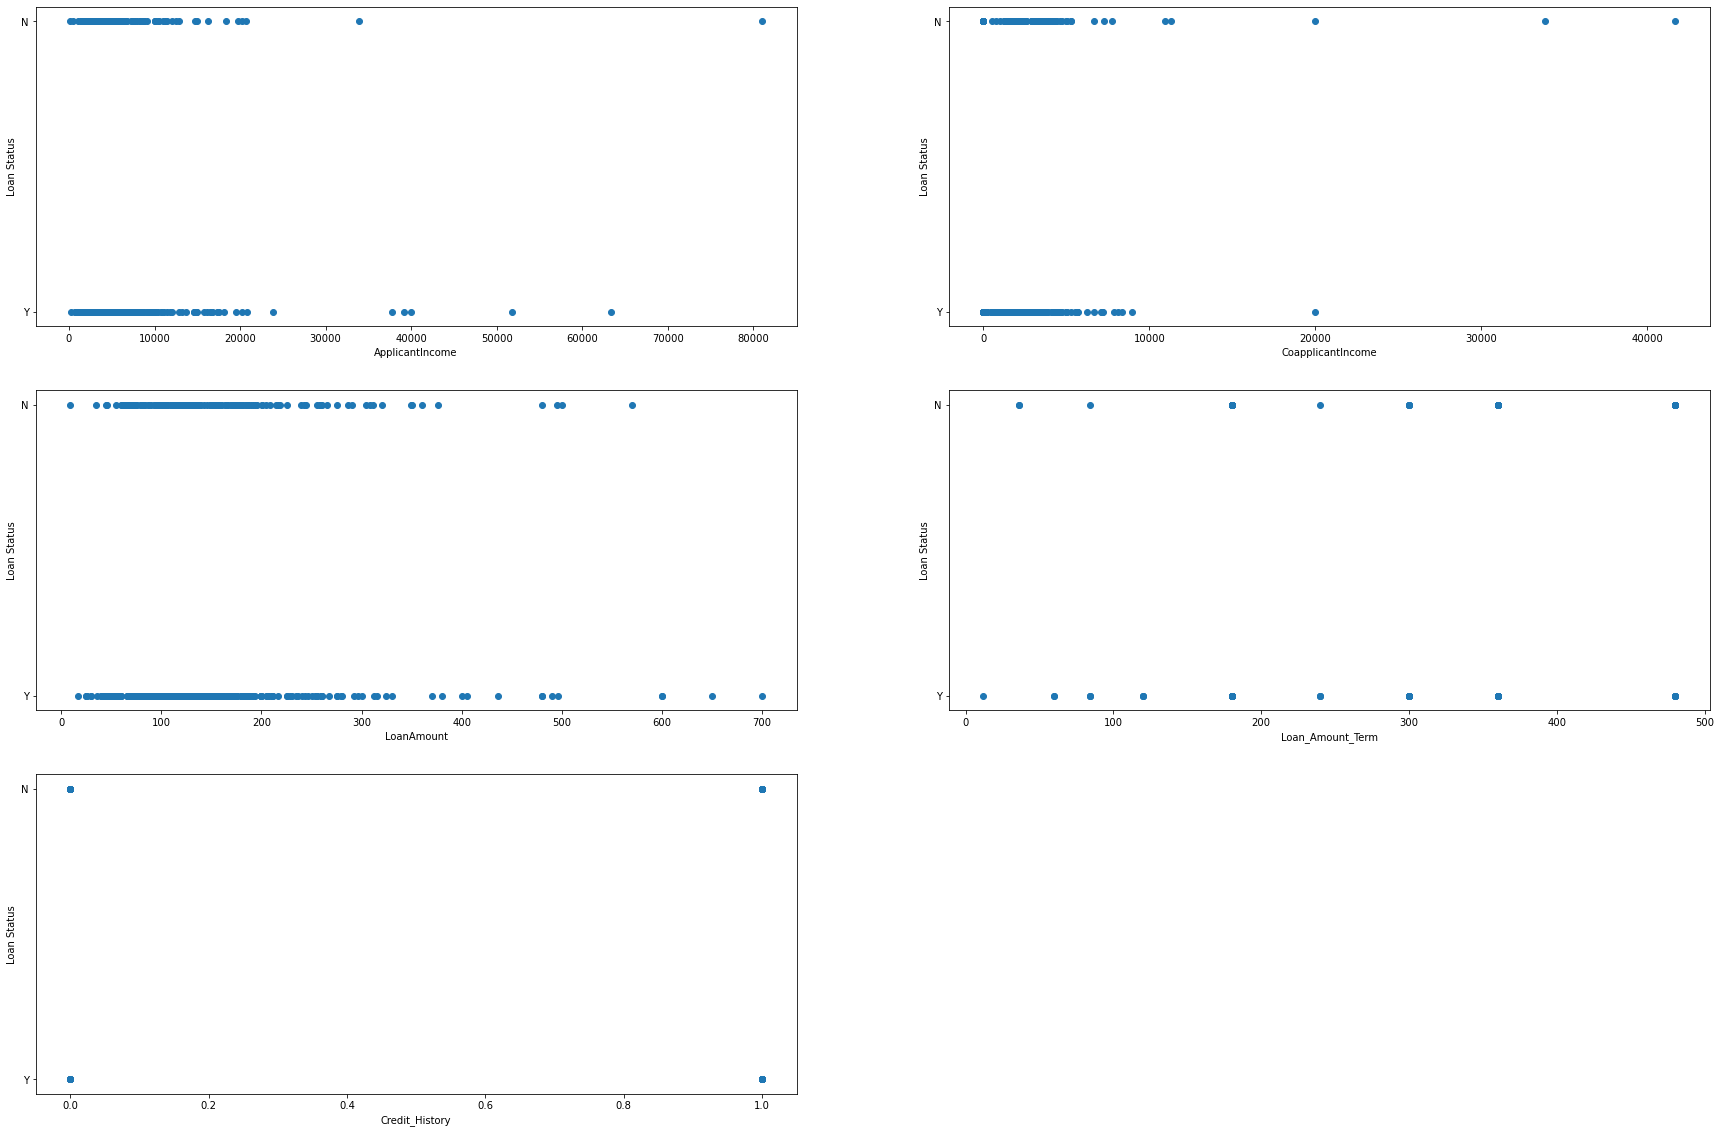

In [235]:
# pairwise plotting for numerical 
j=1
plt.figure(figsize=(30,20))
for i in numericalCol:
    plt.subplot(3,2,j)
    plt.scatter(train[i],train['Loan_Status'])
    plt.xlabel(i)
    plt.ylabel('Loan Status')
    j+=1

In [236]:
train.LoanAmount.nunique()


203

In [237]:
train.Loan_Amount_Term.nunique()

10

In [238]:
train.ApplicantIncome.unique()


array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [239]:
# checking outliers

def boxplots(data):
    for feature in data.columns:
        plt.figure(figsize=(10,1))
        if data[feature].dtype !='object':
            sns.boxplot(data[feature],data=data)
            plt.show()
        else:
            print(feature,'is an object')
            plt.show()

Gender is an object


<Figure size 720x72 with 0 Axes>

Married is an object


<Figure size 720x72 with 0 Axes>

Dependents is an object


<Figure size 720x72 with 0 Axes>

Education is an object


<Figure size 720x72 with 0 Axes>

Self_Employed is an object


<Figure size 720x72 with 0 Axes>

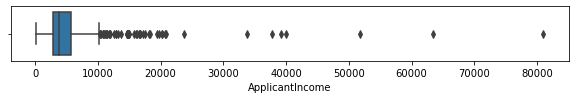

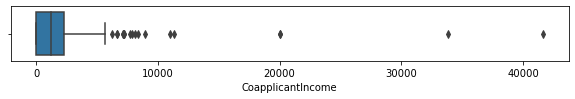

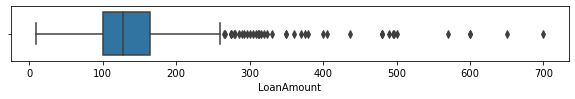

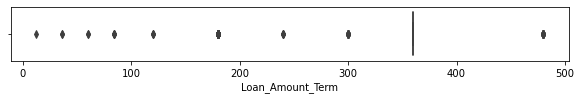

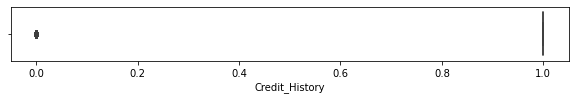

Property_Area is an object


<Figure size 720x72 with 0 Axes>

Loan_Status is an object


<Figure size 720x72 with 0 Axes>

In [240]:
boxplots(train)

In [241]:
contCols = []
discCols = []

for i in numericalCol:
    if train[i].nunique()>20:
        contCols.append(i)
    else:
        discCols.append(i)

In [242]:
contCols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [243]:
discCols

['Loan_Amount_Term', 'Credit_History']

In [244]:
# Outlier Treatment

# 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'

# using std deviation


for i in contCols:
    upper_limit = train[i].mean()+3*train[i].std()
    lower_limit = train[i].mean()-train[i].std()*3

 # Capping
    train.loc[train[i]>upper_limit,i] = upper_limit
    train.loc[train[i]<lower_limit,i] = lower_limit

In [245]:
train.loc[train[i]>upper_limit,i] &  train.loc[train[i]<lower_limit,i]

Series([], Name: LoanAmount, dtype: bool)

In [246]:
# checking outliers

def boxplots(data):
    for feature in data.columns:
        plt.figure(figsize=(10,1))
        if data[feature].dtype !='object':
            sns.boxplot(data[feature],data=data)
            plt.show()
        else:
            print(feature,'is an object')
            plt.show()

Gender is an object


<Figure size 720x72 with 0 Axes>

Married is an object


<Figure size 720x72 with 0 Axes>

Dependents is an object


<Figure size 720x72 with 0 Axes>

Education is an object


<Figure size 720x72 with 0 Axes>

Self_Employed is an object


<Figure size 720x72 with 0 Axes>

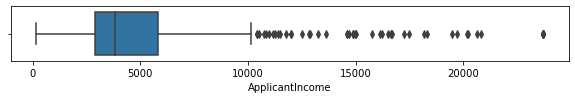

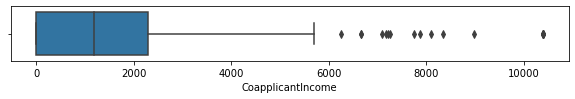

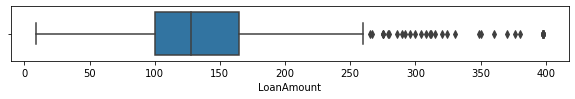

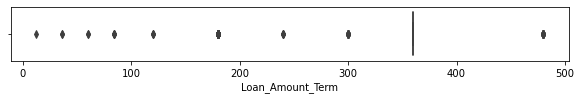

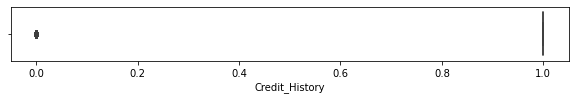

Property_Area is an object


<Figure size 720x72 with 0 Axes>

Loan_Status is an object


<Figure size 720x72 with 0 Axes>

In [247]:
boxplots(train)

In [248]:
trainObjectDF = train[objcol]
trainObjectDF

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [249]:
from collections import defaultdict

defaultEncoder= defaultdict(LabelEncoder)


# variable enconding
fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))

fittrainObjectDF

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [250]:
train.drop(objcol,axis=1,inplace=True)

In [252]:
updated_train = pd.concat([train,fittrainObjectDF],axis=1)

updated_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,4106.0,0.0,40.0,180.0,1.0,1,1,3,0,0,0,1
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,2,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,2,0,0,2,1


In [258]:
corrDF = updated_train.corr()
corrDF

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
ApplicantIncome,1.000000,-0.168254,0.591411,-0.016921,0.026419,0.055147,0.037346,0.102196,-0.176456,0.205153,-0.016371,0.002356
CoapplicantIncome,-0.168254,1.000000,0.269162,-0.034193,-0.007297,0.166945,0.186113,-0.004311,-0.061894,-0.023668,-0.050929,-0.013085
LoanAmount,0.591411,0.269162,1.000000,0.046952,0.001651,0.124790,0.159688,0.169859,-0.177894,0.116346,-0.067594,-0.044956
Loan_Amount_Term,-0.016921,-0.034193,0.046952,1.000000,-0.004705,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.076120,-0.022549
Credit_History,0.026419,-0.007297,0.001651,-0.004705,1.000000,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.001963,0.540556
Gender,0.055147,0.166945,0.124790,-0.074030,0.009170,1.000000,0.364569,0.172914,0.045364,-0.000525,-0.025752,0.017987
Married,0.037346,0.186113,0.159688,-0.100912,0.010938,0.364569,1.000000,0.334216,0.012304,0.004489,0.004257,0.091478
Dependents,0.102196,-0.004311,0.169859,-0.103864,-0.040160,0.172914,0.334216,1.000000,0.055752,0.056798,-0.000244,0.010118
Education,-0.176456,-0.061894,-0.177894,-0.073928,-0.073658,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.065243,-0.085884
Self_Employed,0.205153,-0.023668,0.116346,-0.033739,-0.001550,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.030860,-0.003700


In [264]:
corrCols = corrDF['Loan_Status'].abs().sort_values(ascending=False)
corrCols

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
LoanAmount           0.044956
Property_Area        0.032112
Loan_Amount_Term     0.022549
Gender               0.017987
CoapplicantIncome    0.013085
Dependents           0.010118
Self_Employed        0.003700
ApplicantIncome      0.002356
Name: Loan_Status, dtype: float64